How to animate 2D fields
====================

In this post, we will be discussing how to animate a 2D field.

In this case we're animating the surface temperature of the ERA Interim Dataset for November 1984.

First, we're loading some python modules

In [1]:
# Numpy and xarray are always necessary
import numpy as np
import xarray as xr

# pyplot needed to plot the dataset, but animation only needed much further down.
from matplotlib import pyplot as plt, animation
%matplotlib inline

# This is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


We open the dataset and select the temperature field. We're also converting to Celsius while we're at it.

In [2]:
file='/g/data1/ub4/erai/netcdf/6hr/atmos/oper_an_sfc/v01/tas/tas_6hrs_ERAI_historical_an-sfc_19841101_19841130.nc'
ds=xr.open_dataset(file)

In [3]:
tas=ds.tas
# Change to Celsius
tas[:,:,:] = tas[:,:,:] - 273.15
tas.attrs['units']='degrees_celsius'


Any animation is practically a succession of frames, or still images. What we have to do is generate all frames independently and then stitch them together.

But for a start, we're first looking at the initial images to see what we get:

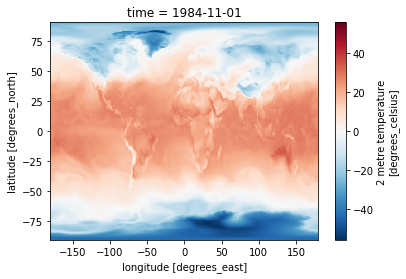

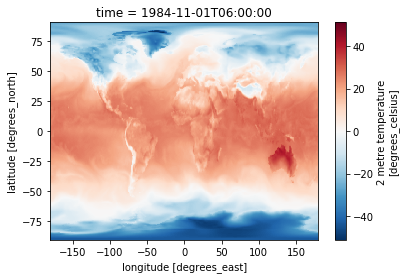

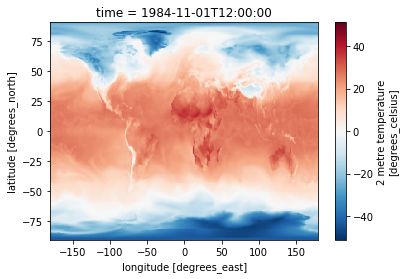

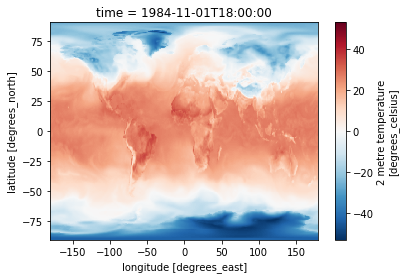

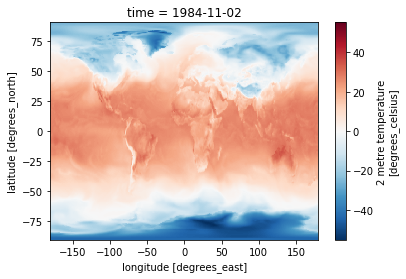

In [4]:
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.show()
    plt.close()

The first thing we notice is the title. At each frame for midnight, it shows only the date, but any other time, it also adds the hours, minutes, and seconds. This makes the title quite jittery, and will not look good in the animation. We need to set the title manually.

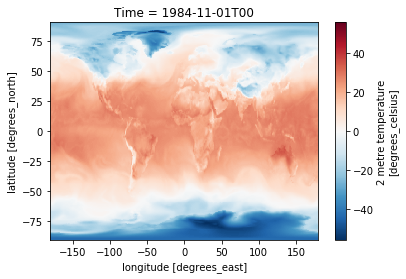

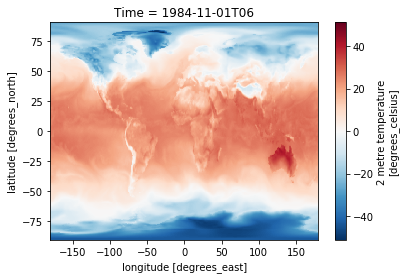

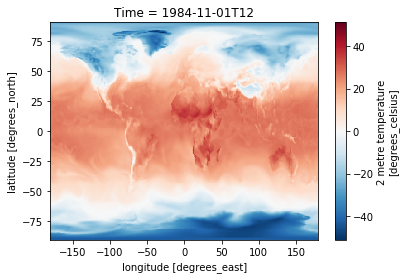

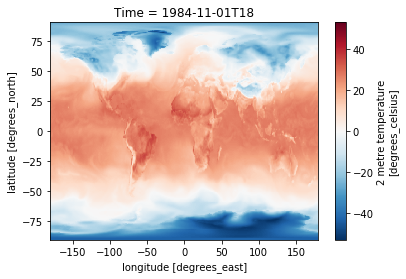

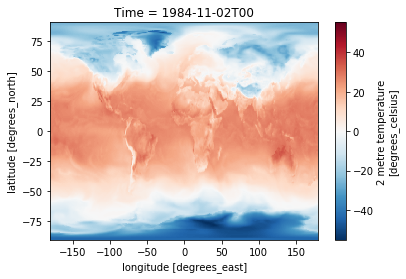

In [5]:
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.show()
    plt.close()

Now that we have a constant width title, and everything else seems fine, we can start working on the animation.

## Animated Gif
If we want to create an animated Gif, we'll start by creating the frames and save them to PNG files independently.

In [6]:
for i in range(40):
    tas[i,:,:].plot(
        figsize = (12,6)      # We'll make it a bit bigger
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"test_01_frame_{i:04}.png")
    plt.close()

In the `savefig` command, we're using an "f-string", that is a litteral f followed by a string. This means that inside the string, any braces will indicate where it should replace something.

In this case, `{i:04}` means replace this with the value of `i`, zero-padded on the left to 4 digits.

We can see the files with the `ls` command:

In [7]:
!ls

2018-04-19-cartopy-maps.ipynb			  test_01_frame_0011.png
2018-04-19-plotting-basics.ipynb		  test_01_frame_0012.png
2018-04-24-reading-envi-met.ipynb		  test_01_frame_0013.png
2018-04-27-subplots.ipynb			  test_01_frame_0014.png
2018-04-27-xarray-plot-types.ipynb		  test_01_frame_0015.png
2018-05-01-latlon-reference.ipynb		  test_01_frame_0016.png
2018-05-22-python-netcdf.ipynb			  test_01_frame_0017.png
2018-08-02-Merge-arrays-with-missing-data.ipynb   test_01_frame_0018.png
2018-08-16-search-cmip5-data-interactively.ipynb  test_01_frame_0019.png
2018-09-14-dask-era-interim.ipynb		  test_01_frame_0020.png
2018-09-28-line-plots-with-xarray.ipynb		  test_01_frame_0021.png
2018-10-05-introduction-to-python-logging.ipynb   test_01_frame_0022.png
2018-10-12-create-netcdf.ipynb			  test_01_frame_0023.png
2018-11-27-Value-when-other-is-max.ipynb	  test_01_frame_0024.png
2019-01-18-using-opendap.ipynb			  test_01_frame_0025.png
2019-03-01-coupling-resolution.ipynb		  test_01_frame_0026.png
20

The easiest way to convert this to an animated gif is to use the command line tool `convert`, which is part of "ImageMagick":

In [8]:
!convert test_01_frame*png test_01.gif
display(HTML("<img src='test_01.gif' />"))

The `display(HTML())` part includes the image as part of the website. Unfortunately this also means that the image will probably be cached by the browser, so don't be too surprised if it doesn't seem to change even if you make changes to the code. 

We will be using higher test numbers in the file names to distinguish between animations. 

Anyway, we see that the colorbar at the side is flickering widely. The ticks are always going from -40 to 40, but they are not stationary at all. So let's fix them.

In [9]:
for i in range(40):
    tas[i,:,:].plot(
        figsize = (12,6),
        vmin=-50, vmax=50  # Minimum and Maximum values
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"test_02_frame_{i:04}.png")
    plt.close()

In [10]:
!convert test_02_frame*.png test_02.gif
display(HTML("<img src='test_02.gif' />"))

Now we see that two things have changed: One is the colormap. We liked the old one better, so we need to change that. Also, in some frames, the minimum temperature in some places is below -50 degrees Celsius, which causes the colorbar to get an arrow end pointing down, which causes flickering.

Now we could change the minimum value, but for this example, I'll be using the `kwargs` to disable these arrows.

In [11]:
for i in range(40):
    tas[i,:,:].plot(
        figsize = (12,6),
        vmin=-50, vmax=50,
        cmap='coolwarm',    # Change the colormap back to 'bwr'
        cbar_kwargs={
            'extend':'neither' # Don't extend the colorbar in either direction. Other possibilities
                               # would be 'both', 'min', or 'max'
        }
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"test_03_frame_{i:04}.png")
    plt.close()

In [12]:
!convert test_03_frame*.png test_03.gif
display(HTML("<img src='test_03.gif' />"))

And this is a perfectly good animated gif to use in any presentation or website.
## Animation within Python
This is where the `animation` import from the beginning comes in.

The animation is trickier, because we need to interact with the module, the figures, even the axes explicitly, but it's also a lot shorter.

This is still a bit confusing even to me, but it seems as if this part doesn't work if we don't execute all the code in a single cell.

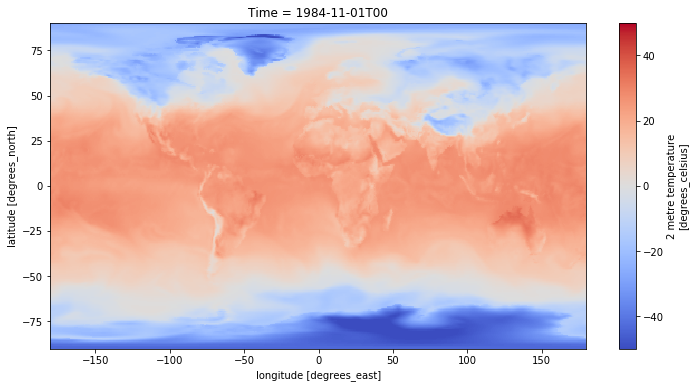

In [13]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))

# Plot the initial frame. 
cax = tas[0,:,:].plot(
    add_colorbar=True,
    cmap='coolwarm',
    vmin=-50, vmax=50,
    cbar_kwargs={
        'extend':'neither'
    }
)

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(tas[frame,:,:].values.flatten())
    ax.set_title("Time = " + str(tas.coords['time'].values[frame])[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=40,       # Could also be iterable or list
    interval=400     # ms between frames
)

Now that we have the animation object, we can either display it as a JavaScript App:

In [14]:
HTML(ani.to_jshtml())

Or we can save it as, for example, an mp4:

In [15]:
ani.save('test_04.mp4')
display(HTML("<video controls><source src='test_04.mp4' type='video/mp4'></video>"))